<a href="https://colab.research.google.com/github/Zaheer-10/NeuralNetHub/blob/main/Transfer_learning_feature_extraction(data_augmentation)_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Transfer Learning Feature-Extraction (data-augmentation).**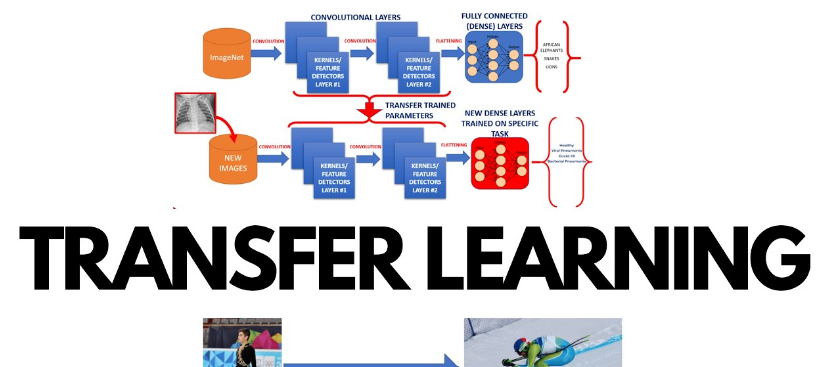

In [13]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [14]:
!kaggle datasets download -d salader/dogs-vs-cats

dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [15]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [16]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Flatten
from keras.applications.vgg16 import VGG16

In [17]:
conv_base = VGG16(
    weights='imagenet',
    include_top = False,
    input_shape=(150,150,3)
)

In [18]:
model = Sequential()

model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [19]:
conv_base.trainable = False

In [20]:
from keras.preprocessing.image import ImageDataGenerator

In [21]:
batch_size = 32

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        '/content/train',
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        '/content/test',
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [22]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [23]:
history = model.fit_generator(
        train_generator,
        epochs=10,
        validation_data=validation_generator)

<ipython-input-23-b2b64d53260b>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/10
625/625 [==============================] - 195s 294ms/step - loss: 0.3110 - accuracy: 0.8669 - val_loss: 0.2192 - val_accuracy: 0.9084
Epoch 2/10
625/625 [==============================] - 180s 289ms/step - loss: 0.2375 - accuracy: 0.8997 - val_loss: 0.2088 - val_accuracy: 0.9138
Epoch 3/10
625/625 [==============================] - 183s 292ms/step - loss: 0.2263 - accuracy: 0.9036 - val_loss: 0.2165 - val_accuracy: 0.9094
Epoch 4/10
625/625 [==============================] - 182s 291ms/step - loss: 0.2137 - accuracy: 0.9101 - val_loss: 0.1992 - val_accuracy: 0.9166
Epoch 5/10
625/625 [==============================] - 177s 284ms/step - loss: 0.2082 - accuracy: 0.9121 - val_loss: 0.1979 - val_accuracy: 0.9138
Epoch 6/10
625/625 [==============================] - 178s 285ms/step - loss: 0.1988 - accuracy: 0.9158 - val_loss: 0.1937 - val_accuracy: 0.9180
Epoch 7/10
625/625 [==============================] - 178s 284ms/step - loss: 0.1902 - accuracy: 0.9225 - val_loss: 0.2432 -

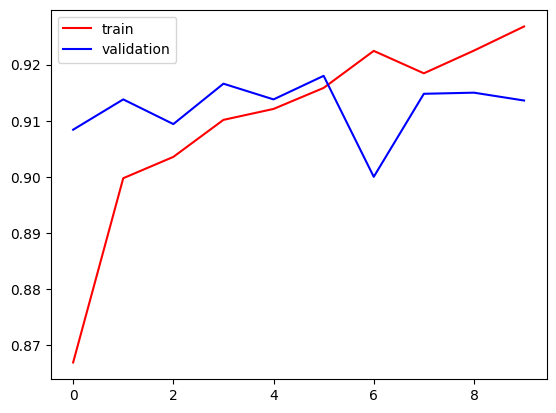

In [24]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

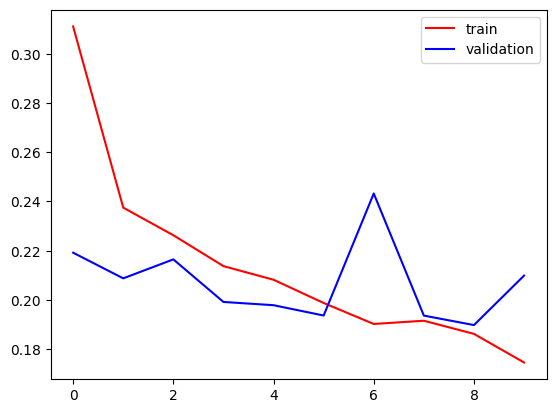

In [25]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()